In [1]:
import os 
os.chdir("..")
from numerics.integration.steps import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numerics.utilities.misc import *

In [4]:
times = np.load("/home/cooper-cooper/Desktop/quantera/trajectories/[1, 100, 1000000, 10000.0, 1]/0itraj/rossler_real_traj_method/10periods/1000ppp/1rppp/times.npy")
states = np.load("/home/cooper-cooper/Desktop/quantera/trajectories/[1, 100, 1000000, 10000.0, 1]/0itraj/rossler_real_traj_method/10periods/1000ppp/1rppp/states.npy")

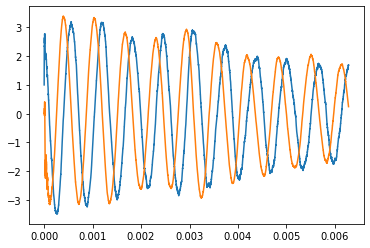

In [7]:
plt.plot(times, states[:-1])

In [34]:
times1 = np.load("/home/cooper-cooper/Desktop/quantera/trajectories/discrimination/[[100, 50000.0, 1, 1, 1000000.0], [100, 10000.0, 1, 1, 1000000.0]]/10itraj/hybrid_method/0.006283185307179586_total_time/1.2566370614359171e-08_dttimes.npy")
states1 = np.load("/home/cooper-cooper/Desktop/quantera/trajectories/discrimination/[[100, 50000.0, 1, 1, 1000000.0], [100, 10000.0, 1, 1, 1000000.0]]/10itraj/hybrid_method/0.006283185307179586_total_time/1.2566370614359171e-08_dtstates1.npy")
covs = np.load("/home/cooper-cooper/Desktop/quantera/trajectories/discrimination/[[100, 50000.0, 1, 1, 1000000.0], [100, 10000.0, 1, 1, 1000000.0]]/10itraj/hybrid_method/0.006283185307179586_total_time/1.2566370614359171e-08_dtcovs1.npy")

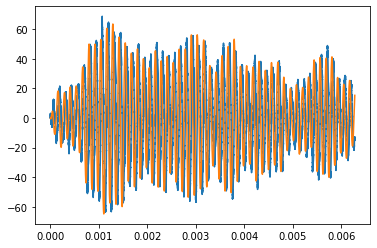

In [38]:
plt.plot(times1, states1[:-1])

In [29]:
params = give_def_params_discrimination(flip = 0, mode="frequencies")
params, exp_path = check_params_discrimination(params)
[gamma1, omega1, n1, eta1, kappa1], [gamma0, omega0, n0, eta0, kappa0] = params

total_time, dt = get_total_time_dt(params, ppp=1e4)

FREQUENCY DISCRIMINATION!



In [24]:
def give_ders(vx, vp, cvxp, gamma_val, omega_val, kappa_val,n_val, eta_val):
    return  [-4*cvxp**2*eta_val*kappa_val + 2*cvxp*omega_val - gamma_val*vx + gamma_val*(n_val + 0.5) + kappa_val - 4*vx**2*eta_val*kappa_val,
     -4*cvxp**2*eta_val*kappa_val - 2*cvxp*omega_val - gamma_val*vp + gamma_val*(n_val + 0.5) + kappa_val - 4*vp**2*eta_val*kappa_val,
     -cvxp*gamma_val - 4*cvxp*vp*eta_val*kappa_val - 4*cvxp*vx*eta_val*kappa_val + omega_val*vp - omega_val*vx]


10000

In [33]:
def give_matrices(gamma, omega, n, eta, kappa):
    A = np.array([[-gamma/2, omega],[-omega, -gamma/2]])
    C = np.sqrt(4*eta*kappa)*np.array([[1.,0.],[0.,0.]]) #homodyne
    D = np.diag([gamma*(n+0.5) + kappa]*2)
    return A, C, D

A1, C1, D1 = give_matrices(gamma1, omega1, n1, eta1, kappa1)
A0, C0, D0 = give_matrices(gamma0, omega0, n0, eta0, kappa0)

lin0, lin1 = 0., 0.
x1in ,p1in, x0in, p0in, dyxin, dypin = np.zeros(6)

### stationary state for the covariance
def stat(gamma, omega, n, eta, kappa):
    suc = n + 0.5 + kappa/gamma
    sst = (gamma/(8*eta*kappa))*(np.sqrt(1 + 16*eta*kappa*suc/gamma ) -1 )
    return suc, sst

suc1, sst1 = stat(gamma1, omega1, n1, eta1, kappa1)
suc0, sst0 = stat(gamma0, omega0, n0, eta0, kappa0)
varx10, varp10, covxy10 = sst1 ,sst1 ,0.
varx0, varp0, covxy0 = sst0 ,sst0 ,0.

In [32]:
varx10

0.5000249987500938

In [ ]:
give_ders(varx10, varp10, covxy10)

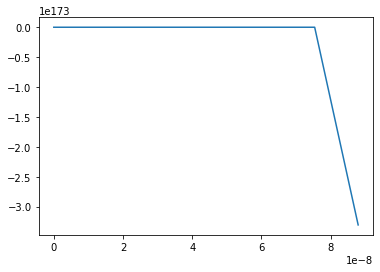

In [16]:
plt.plot(times1,states1[:-1][:,1])

In [2]:
itraj = 1

total_time = 4
dt = 1e-6

In [3]:
times = np.arange(0,total_time + dt, dt)

pars = give_def_params_discrimination(flip=0) ## H0 is the true hypothesis
params, exp_path = check_params(pars)

logliks =load_data_discrimination_liks(itraj=itraj, total_time = total_time, dt=dt, exp_path = exp_path)
l0,l1 = logliks[:,0], logliks[:,1]
log_lik_ratio = l1 - l0  ###

logliks_swap =load_data_discrimination_liks(itraj=itraj, total_time = 4, dt=1e-6, exp_path = exp_path)
### logliks ---> p(yt | \thetaNull)  , p(yt | thetaTrue )

#### for the other hypothesis, flip the parameters
pars = give_def_params_discrimination(flip=1)
params, exp_path = check_params(pars)
### now we want to see the p(H1 | H0) ---> check how many times we'd guess for h1 if data generated by h0 at stopping time
log_lik_ratio_swap = logliks[:,0] - logliks[:,1]  ### since i swapped the parameters, this gives p(y_t | h1)/p(y_t | h0)   (now in the case where i generate y_t under h0)


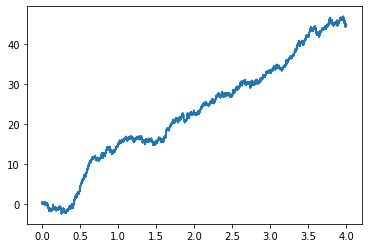

In [4]:
plt.plot(times,log_lik_ratio[:-1])

In [5]:
def load_liks(itrajj):
    pars = give_def_params_discrimination(flip=0)
    params, exp_path = check_params(pars)

    logliks =load_data_discrimination_liks(itraj=itrajj, total_time = total_time, dt=dt, exp_path = exp_path)
    l0,l1 = logliks[:,0], logliks[:,1]
    log_lik_ratio = l1 - l0  ###

    
    pars = give_def_params_discrimination(flip=1)
    params, exp_path = check_params(pars)
    logliks_swap =load_data_discrimination_liks(itraj=itrajj, total_time = 4, dt=1e-6, exp_path = exp_path)

    log_lik_ratio_swap = logliks[:,0] - logliks[:,1]  
    
    return log_lik_ratio, log_lik_ratio_swap

In [48]:
indis = np.logspace(2,np.log10(len(times)), 20)
indis = [int(k) for k in indis]

In [49]:
def decide(l, a, b):
    if (l <= a) == True:
        return 1
    elif (l >= b) == True:
        return 0
    else:
        return 0j

In [50]:
deter, stoch = {}, {}
deter["h0/h1"]  = []
deter["h1/h0"] = []
stoch["h1/h0"] = {}
stoch["h0/h1"] = {}

boundsB = np.arange(1,5,1)
boundsA = np.sort(-boundsB)[::-1]
for ind_bound in range(len(boundsB)):
    stoch["h0/h1"][ind_bound] = []
    stoch["h1/h0"][ind_bound] = []    

In [51]:
itraj = 1
log_lik_ratio, log_lik_ratio_swap = load_liks(itraj)

for time_index in tqdm(indis):
    h0_deter = log_lik_ratio[time_index] <= 0
    h1_deter = log_lik_ratio_swap[time_index] <= 0
    deter["h0/h1"].append(int(h0_deter))
    deter["h1/h0"].append(int(h0_deter))
    for ind_bound, a, b in zip(range(len(boundsB)), boundsA, boundsB):
        stoch["h0/h1"][ind_bound].append(decide(log_lik_ratio[time_index], a, b))
        stoch["h1/h0"][ind_bound].append(decide(log_lik_ratio_swap[time_index], a, b))
n=1

100%|██████████| 20/20 [00:00<00:00, 14251.80it/s]


In [ ]:
for itraj in tqdm(range(2,1000)):
    try:
        log_lik_ratio, log_lik_ratio_swap = load_liks(itraj)
        n+=1
        for ind, time_index in enumerate(indis):
            h0_deter = log_lik_ratio[time_index] <= 0
            h1_deter = log_lik_ratio_swap[time_index] <= 0
            deter["h0/h1"][ind] +=  (int(h0_deter) - deter["h0/h1"][ind] )/n
            deter["h1/h0"][ind] += (int(h0_deter) - deter["h1/h0"][ind])/n
            for ind_bound, a, b in zip(range(len(boundsB)), boundsA, boundsB):
                stoch["h0/h1"][ind_bound][ind] += (decide(log_lik_ratio[time_index], a, b) - stoch["h0/h1"][ind_bound][ind])/n
                stoch["h1/h0"][ind_bound][ind] += (decide(log_lik_ratio_swap[time_index], a, b) - stoch["h1/h0"][ind_bound][ind])/n
    except Exception:
        pass

 49%|████▊     | 486/998 [01:17<05:20,  1.60it/s]

In [ ]:
ht_dir = get_def_path()+"hypothesis_testing/set1/"
os.makedirs(ht_dir, exist_ok=True)
np.save(ht_dir+"deter_alpha", deter["h0/h1"])
np.save(ht_dir+"deter_beta", deter["h1/h0"])
np.save(ht_dir+"stoch_alpha", np.stack(list(stoch["h0/h1"].values())))
np.save(ht_dir+"stoch_beta", np.stack(list(stoch["h1/h0"].values())))
np.save(ht_dir+"bounds", boundsB)
np.save(ht_dir+"times", times)
np.save(ht_dir+"ind_times_computed", indis)

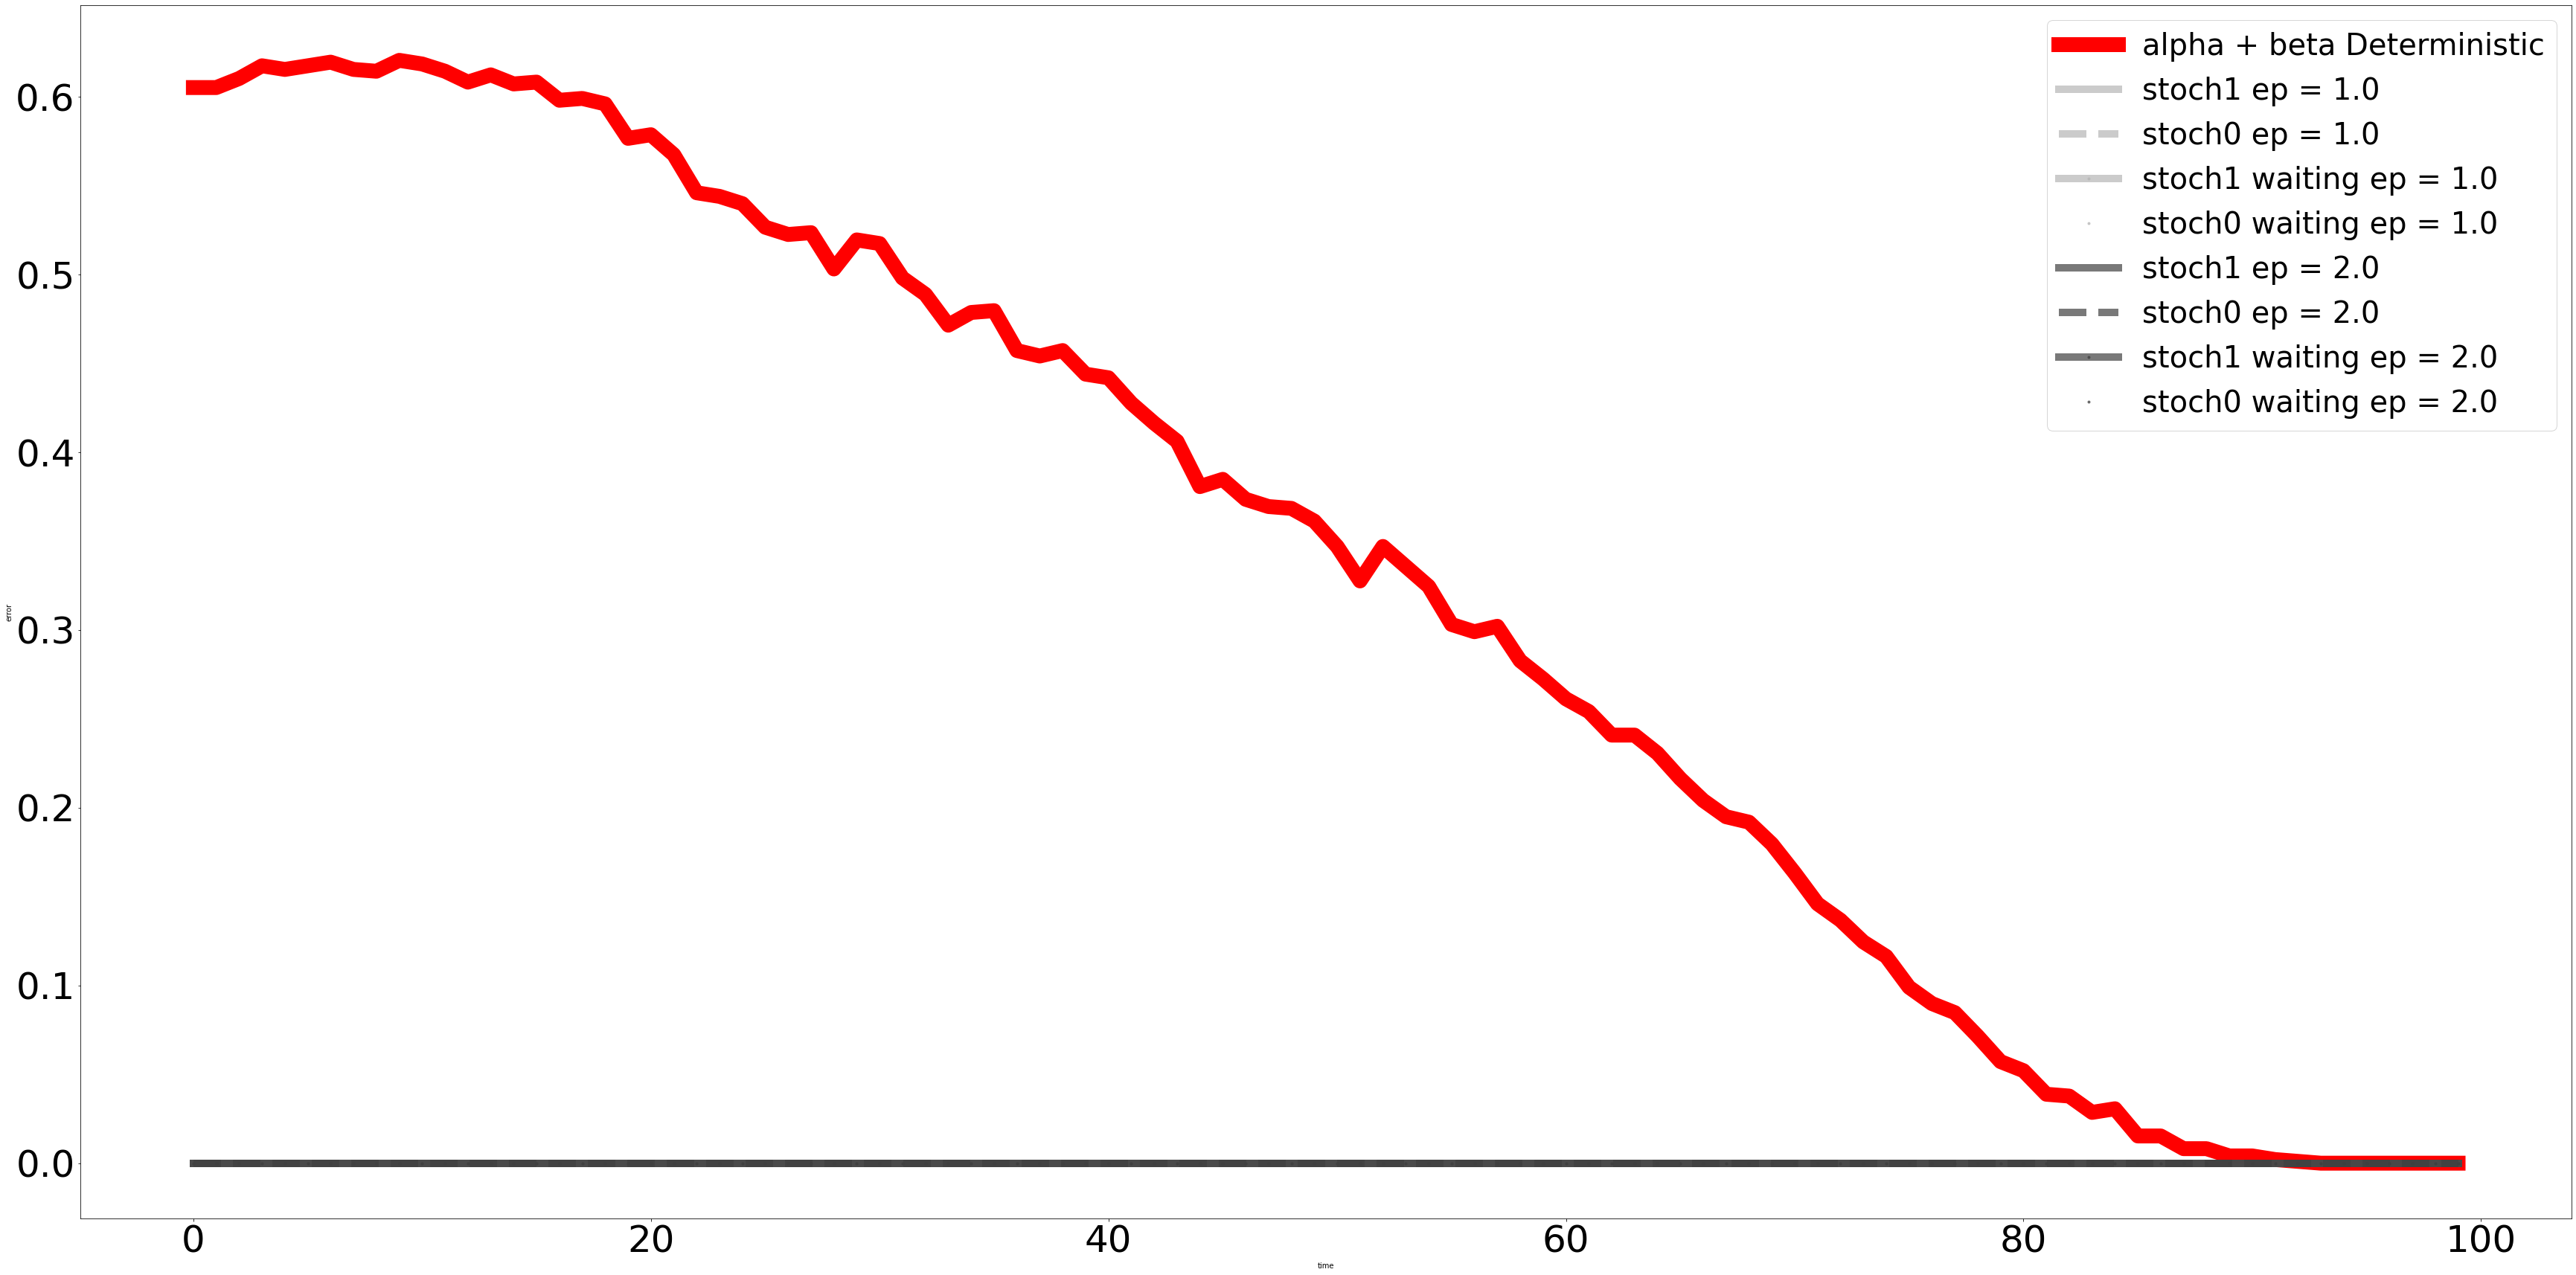

In [40]:

import matplotlib as mpl
label_size = 50
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

lstoch=10
ldet = 10

plt.figure(figsize=(60,30))
plt.plot(0.5*(deter["h0/h1"]+deter["h1/h0"]), linewidth=2*ldet, color="red", label="alpha + beta Deterministic")
#plt.plot(deter["h1/h0"], linewidth=ldet,color="blue", label="beta")


colors = plt.get_cmap("Greys")
mybounds = list(range(len(boundsB)))[::10][:2]
indiis = np.linspace(.4,.8,len(mybounds))

colores = colors(indiis)
for ii, ind_bound in enumerate(mybounds):
    plt.plot(np.real(stoch["h0/h1"][ind_bound]), linewidth=lstoch, c=colores[ii], alpha=0.7,label="stoch1 ep = {}".format(np.round(boundsB[ind_bound],2)))
    plt.plot(np.real(stoch["h1/h0"][ind_bound]),'--', linewidth=lstoch,c=colores[ii],alpha=0.7,label="stoch0 ep = {}".format(np.round(boundsB[ind_bound],2)))
    plt.plot(np.imag(stoch["h0/h1"][ind_bound]), '.-',linewidth=lstoch,c=colores[ii], alpha=0.7,label="stoch1 waiting ep = {}".format(np.round(boundsB[ind_bound],2)))
    plt.plot(np.imag(stoch["h1/h0"][ind_bound]), '.',linewidth=lstoch,c=colores[ii], alpha=0.7,label="stoch0 waiting ep = {}".format(np.round(boundsB[ind_bound],2)))
    
plt.ylabel("error")
plt.xlabel("time")
plt.legend(prop={"size":40})
#plt.savefig("deter_errors.pdf")

In [117]:
deter, stoch = {}, {}
deter["h0/h1"]  = []
deter["h1/h0"] = []
stoch["h1/h0"] = {}
stoch["h0/h1"] = {}

boundsB = np.arange(1,10.1,.1)
boundsA = np.sort(-boundsB)[::-1]
for ind_bound in range(len(boundsB)):
    stoch["h0/h1"][ind_bound] = []
    stoch["h1/h0"][ind_bound] = []    
    
deter["h0/h1"] = np.load(ht_dir+"deter_alpha.npy")
deter["h1/h0"] = np.load(ht_dir+"deter_beta.npy")
stochh0h1_stacked = np.load(ht_dir+"stoch_alpha.npy")
stochh1h0_stacked = np.load(ht_dir+"stoch_beta.npy")


for k, b in enumerate(boundsB):
    stoch["h0/h1"][k] = stochh0h1_stacked[k,:]
    stoch["h1/h0"][k] = stochh1h0_stacked[k,:]

(1+1j)

In [116]:
stoch["h0/h1"][2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

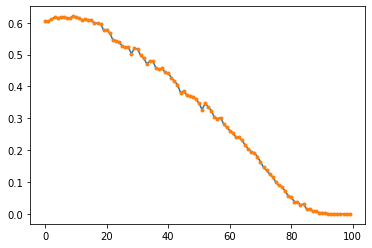

In [113]:
plt.plot(deter["h0/h1"])
plt.plot(deter["h1/h0"],'.')

In [100]:
plt.plot(deter["h0/h1"])
np.real(stoch["h1/h0"][ind_bound])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
#[times[int(k)] for k in indis]

In [ ]:


### stand up at the equal likelihood point ---> you choose max-likelihood hypothesis!
h0 = log_lik_ratio[ind_time_sprt_avg_stop_time] <= 0
h0_sprt = log_lik_ratio[ind_time_sprt_avg_stop_time] <= -3

sprt_errs["h0/h1"].append(int(h0_sprt))
np_errs["h0/h1"].append(int(h0))


### stand up at the equal likelihood point ---> you choose max-likelihood hypothesis!
h1 = log_lik_ratio_swap[ind_time_sprt_avg_stop_time] >= 0
h1_sprt = log_lik_ratio_swap[ind_time_sprt_avg_stop_time] >= 3

np_errs["h1/h0"].append(int(h1))
sprt_errs["h1/h0"].append(int(h1_sprt))
